In [3]:
import pandas as pd

train_df = pd.read_csv("./ssec/val.csv", error_bad_lines=False, header=None, delimiter="\t")
train_df

/Users/ItishaYadav1/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8
0,Anger,Anticipation,Disgust,---,Joy,---,---,---,"on a side note, just because you think smtg is..."
1,---,Anticipation,---,---,Joy,---,Surprise,---,Woah the hashtag puts the rainbow heart itself...
2,Anger,Anticipation,Disgust,Fear,---,Sadness,---,---,I refuse 2comply w/Bad laws. Just Because #SCO...
3,Anger,---,---,---,Joy,---,---,Trust,Just owned a woman who works for planned paren...
4,Anger,Anticipation,Disgust,---,---,Sadness,---,---,If it's getting old maybe you should stop call...
...,...,...,...,...,...,...,...,...,...
287,Anger,---,Disgust,---,---,Sadness,---,---,"There's a law protecting unborn eagles, but no..."
288,---,---,---,---,---,Sadness,---,Trust,I am 1 in 3... I have had an abortion #Abortio...
289,Anger,Anticipation,Disgust,---,---,Sadness,---,---,How dare you say my sexual preference is a cho...
290,Anger,---,Disgust,---,---,Sadness,---,---,"Equal rights for those 'born that way', no rig..."


# Data Details # Multi-label-classification
# Emotions tags:
Anger, Anticipation, Disgust, Fear, Joy, Sadness, Surprise, Trust
train.csv = 2622
test.csv = 1956
val.csv = 292

In [1]:
import pandas as pd
mapping = {"fear": 1, "anger": 2, "guilt": 3, "joy": 4, "shame": 5, "disgust": 6, "sadness": 7}
isear_train_df = pd.read_csv("./isear/isear-train.csv", error_bad_lines=False, header=None)


mapped_emotions = isear_train_df[0].map(mapping)
isear_train_df[0] = mapped_emotions

print(isear_train_df.shape)
isear_train_df[0].value_counts()

(5333, 2)


/Users/ItishaYadav1/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 119: expected 2 fields, saw 7\nSkipping line 1213: expected 2 fields, saw 4\nSkipping line 2323: expected 2 fields, saw 3\nSkipping line 2803: expected 2 fields, saw 3\nSkipping line 3630: expected 2 fields, saw 4\nSkipping line 4635: expected 2 fields, saw 5\nSkipping line 4797: expected 2 fields, saw 4\n'


4.0    777
3.0    766
7.0    760
2.0    758
5.0    757
6.0    757
1.0    751
Name: 0, dtype: int64

# Data Details # Multi-class-classification
# Emotions tags:
joy, guilt, sadness, anger, shame, disgust, fear
train.csv = 5333
test.csv = 1146
val.csv = 1150

In [2]:
# Recall
import numpy as np


class evaluation:
    def __init__(self, y_actual, y_pred):
        self.y_actual = np.array(y_actual)
        #print(self.y_actual)
        self.y_pred = np.array(y_pred)
        #print(self.y_pred)

    def confusion_matrix(self, actual, pred):
        tp = fp = tn = fn = 0
        for i, j in zip(actual, pred):
            if i == 1:
                # positive
                if i == j:
                    tp += 1
                else:
                    fp += 1
            else:
                # negative
                if i == j:
                    tn += 1
                else:
                    fn += 1
        cf = pd.DataFrame([[tp, fp], [fn, tn]], columns=["actual_pos", "actual_neg"], index=["pred_pos", "pred_neg"])
        return cf, tp, fp, tn, fn

    def recall(self, actual, pred):
        cf, tp, fp, tn, fn = self.confusion_matrix(actual, pred)
        return tp / (tp+fn)

    def precision(self, actual, pred):
        cf, tp, fp, tn, fn = self.confusion_matrix(actual, pred)
        return tp / (tp+fp)

    def f1(self, actual, pred):
        # harmonic mean
        pr = self.precision(actual, pred)
        re = self.recall(actual, pred)
        f1 = 2 * ((pr * re) / (pr + re))
        return f1

    def main(self):
        mapping = {1: "fear", 2: "anger", 3: "guilt", 4: "joy", 5: "shame", 6: "disgust", 7: "sadness"}
        res = {}
        for cls in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0 ,7.0]:
            c = 0
            #print("Class : ", mapping[cls])
            mod_y_actual = []
            for i in self.y_actual:
                if i == cls:
                    c += 1
                    mod_y_actual.append(1)
                else:
                    mod_y_actual.append(0)
            mod_y_pred = []
            for i in self.y_pred:
                if i == cls:
                    mod_y_pred.append(1)
                else:
                    mod_y_pred.append(0)
            #print(mod_y_pred)
            """
            print()
            print()
            print("Confusion Matrix : \n", self.confusion_matrix(mod_y_actual, mod_y_pred)[0])
            print("*******************************************************\n")
            print("Precision : \n", self.precision(mod_y_actual, mod_y_pred))
            print("*******************************************************\n")
            print("Recall : \n", self.recall(mod_y_actual, mod_y_pred))
            print("*******************************************************\n")
            print("F1 Score : \n", self.f1(mod_y_actual, mod_y_pred))
            print()
            print()
            """
            temp = [self.precision(mod_y_actual, mod_y_pred), self.recall(mod_y_actual, mod_y_pred), self.f1(mod_y_actual, mod_y_pred), c]
            res[mapping[cls]] = temp
        res = pd.DataFrame(res, index=["Precision", "Recall", "F1-Score", "Count"]).transpose()
        print(res.shape)
        """
        Macro average calculationd
        """
        avg_pr = np.sum((res["Precision"]*res["Count"]))/ np.sum(res["Count"])
        avg_re = np.sum((res["Recall"]*res["Count"]))/ np.sum(res["Count"])
        avg_f1 = np.sum((res["F1-Score"]*res["Count"]))/ np.sum(res["Count"])
        res.loc["Macro_Average"] = [avg_pr, avg_re, avg_f1, np.sum(res["Count"])]
        #res = pd.concat([res, pd.DataFrame([avg_pr, avg_re, avg_f1, np.sum(res["Count"])]).transpose()])

        flattened_index = ["Fear-Precision", "Fear-Recall", "Fear-F1score", "Fear-Count",
                           "Anger-Precision", "Anger-Recall", "Anger-F1score", "Anger-Count",
                           "Guilt-Precision", "Guilt-Recall", "Guilt-F1score", "Guilt-Count",
                           "Joy-Precision", "Joy-Recall", "Joy-F1score", "Joy-Count",
                           "Shame-Precision", "Shame-Recall", "Shame-F1score", "Shame-Count",
                           "Disgust-Precision", "Disgust-Recall", "Disgust-F1score", "Disgust-Count",
                           "Sadness-Precision", "Sadness-Recall", "Sadness-F1score", "Sadness-Count",
                           "Macro-Average-Precision", "Macro-Average-Recall", "Macro-Average-F1score", "Macro-Average-Count"]
        res_flattened = pd.DataFrame(res.to_numpy().flatten(), index=flattened_index).transpose()
        return res_flattened, res




obj = evaluation(isear_train_df[0], isear_train_df[0])
obj.main()[0]



(7, 4)


,Fear-Precision,Fear-Recall,Fear-F1score,Fear-Count,Anger-Precision,Anger-Recall,Anger-F1score,Anger-Count,Guilt-Precision,Guilt-Recall,...,Disgust-F1score,Disgust-Count,Sadness-Precision,Sadness-Recall,Sadness-F1score,Sadness-Count,Macro-Average-Precision,Macro-Average-Recall,Macro-Average-F1score,Macro-Average-Count
0,1.0,1.0,1.0,751.0,1.0,1.0,1.0,758.0,1.0,1.0,...,1.0,757.0,1.0,1.0,1.0,760.0,1.0,1.0,1.0,5326.0


Baseline Method Implementation

In [3]:
stopwords = {'hers', 'below', "wouldn't", 'nor', 'for', 'over', "hasn't", 'at', 'shouldn', 'only', 'above', 'itself', 'yourselves', 'what', "don't", "it's", 'which', 'against', "that'll", 'has', 'i', 'his', 'having', 'then', "shan't", 'myself', 'do', 'yours', 'up', 'own', 'the', 'same', 'aren', 'few', 'through', 'here', 'whom', 'o', "aren't", 'were', 'are', 'both', "didn't", 'll', 'again', 'is', 're', "wasn't", "you'll", 'm', "haven't", 'such', 'off', 'of', 'it', 'did', 'into', 'to', 'other', 'was', 'just', 've', "mustn't", 'while', 'about', 'each', 'by', 'this', 'isn', 'ourselves', 'in', 'our', 'couldn', 'until', 'where', "couldn't", 'ain', "you'd", 'all', 'when', 'does', 'before', 'weren', 'y', 'doing', 'than', 'being', 'my', 'mightn', 'yourself', 'with', 'theirs', 'so', "needn't", 'a', "doesn't", "isn't", 'its', 'your', 'if', "should've", 'ma', 'can', 'herself', 'but', 'too', 'more', 'her', "hadn't", 'hadn', 'there', "you're", 'from', 'should', 'we', 'how', 'out', 'once', 'mustn', 'won', 'their', 'don', 'had', 'he', 'or', 'didn', 'd', 'down', 't', "she's", 'that', 'himself', 'wouldn', "you've", "mightn't", 'between', 'them', 'on', 'haven', 'after', 'themselves', 'because', 'and', 'you', 'very', 's', 'these', 'no', 'now', 'him', 'been', 'those', 'during', 'doesn', 'wasn', 'am', 'under', 'an', 'some', 'have', 'me', 'any', 'who', 'shan', 'why', 'will', "shouldn't", 'not', 'they', "won't", 'needn', 'further', 'most', 'be', 'ours', 'she', 'as', 'hasn', "weren't", "a", "''"}

In [4]:
import re
def getHighFreqWordsByEmotion(df, emo_tag):
    mapping = {1: "fear", 2: "anger", 3: "guilt", 4: "joy", 5: "shame", 6: "disgust", 7: "sadness"}
    wordfreq = {}
    emodf = df[df[0] == emo_tag]
    text = " ".join(list(emodf[1])).split(" ")
    for word in text:
        word = re.sub("[^A-Za-z]", "", word).strip().lower()
        if word not in stopwords and len(word) > 0:
            if word in wordfreq:
                wordfreq[word] += 1
            else:
                wordfreq[word] = 1
    sort_orders = sorted(wordfreq.items(), key=lambda x: x[1], reverse=True)
    print("Type to Token ratio for " + mapping[emo_tag] + " = ", round(len(set(text))/len(text), 2))
    unqWords = [key for key, value in wordfreq.items()]
    return sort_orders, set(unqWords)



In [5]:
"""
Fear
"""
import pickle
fear = getHighFreqWordsByEmotion(isear_train_df, 1)
fear100, fearset = fear[0][0:100], fear[1]
with open('fear100.pickle', 'wb') as handle:
    pickle.dump(fear100, handle, protocol=pickle.HIGHEST_PROTOCOL)

Type to Token ratio for fear =  0.19


In [6]:
"""
Anger
"""

import pickle
anger = getHighFreqWordsByEmotion(isear_train_df, 2)
anger100, angerset = anger[0][0:100], fear[1]
with open('anger100.pickle', 'wb') as handle:
    pickle.dump(anger100, handle, protocol=pickle.HIGHEST_PROTOCOL)

Type to Token ratio for anger =  0.2


In [7]:
"""
Guilt
"""

import pickle
guilt = getHighFreqWordsByEmotion(isear_train_df, 3)
guilt100, guiltset = guilt[0][0:100], guilt[1]
with open('guilt100.pickle', 'wb') as handle:
    pickle.dump(guilt100, handle, protocol=pickle.HIGHEST_PROTOCOL)

Type to Token ratio for guilt =  0.18


In [8]:
"""
Joy
"""

import pickle
joy = getHighFreqWordsByEmotion(isear_train_df, 4)
joy100, joyset = joy[0][0:100], joy[1]
with open('joy100.pickle', 'wb') as handle:
    pickle.dump(joy100, handle, protocol=pickle.HIGHEST_PROTOCOL)

Type to Token ratio for joy =  0.19


In [9]:
"""
Shame
"""

import pickle
shame = getHighFreqWordsByEmotion(isear_train_df, 5)
shame100, shameset = shame[0][0:100], shame[1]
with open('shame100.pickle', 'wb') as handle:
    pickle.dump(shame100, handle, protocol=pickle.HIGHEST_PROTOCOL)

Type to Token ratio for shame =  0.19


In [10]:
"""
Disgust
"""

import pickle
disgust = getHighFreqWordsByEmotion(isear_train_df, 6)
disgust100, disgustset = disgust[0][0:100], disgust[1]
with open('disgust100.pickle', 'wb') as handle:
    pickle.dump(disgust100, handle, protocol=pickle.HIGHEST_PROTOCOL)

Type to Token ratio for disgust =  0.23


In [11]:
"""
sadness
"""

import pickle
sadness = getHighFreqWordsByEmotion(isear_train_df, 7)
sadness100, sadnessset = sadness[0][0:100], sadness[1]
with open('sadness100.pickle', 'wb') as handle:
    pickle.dump(sadness100, handle, protocol=pickle.HIGHEST_PROTOCOL)
sadness100

Type to Token ratio for sadness =  0.18


[('died', 132),
 ('sad', 120),
 ('friend', 117),
 ('felt', 92),
 ('time', 73),
 ('father', 60),
 ('away', 60),
 ('friends', 60),
 ('death', 55),
 ('one', 55),
 ('years', 55),
 ('mother', 51),
 ('close', 51),
 ('home', 45),
 ('left', 42),
 ('passed', 39),
 ('boyfriend', 39),
 ('could', 37),
 ('mine', 35),
 ('told', 34),
 ('would', 34),
 ('grandmother', 33),
 ('thought', 32),
 ('heard', 31),
 ('good', 31),
 ('family', 30),
 ('year', 30),
 ('go', 30),
 ('girl', 29),
 ('relationship', 29),
 ('grandfather', 28),
 ('school', 28),
 ('went', 28),
 ('brother', 27),
 ('got', 27),
 ('sadness', 27),
 ('see', 27),
 ('failed', 26),
 ('day', 26),
 ('old', 26),
 ('made', 26),
 ('sister', 26),
 ('girlfriend', 25),
 ('back', 25),
 ('saw', 25),
 ('first', 24),
 ('cancer', 24),
 ('much', 24),
 ('accident', 24),
 ('didnt', 23),
 ('ill', 23),
 ('feel', 23),
 ('last', 22),
 ('two', 22),
 ('found', 22),
 ('long', 21),
 ('parents', 21),
 ('really', 21),
 ('person', 21),
 ('know', 21),
 ('car', 21),
 ('days', 2

In [12]:
"""
unique fear
"""
res = fearset.union(angerset, sadnessset, disgustset) - joyset
res

{'maltreated',
 'aversion',
 'caterpillar',
 'cope',
 'unfair',
 'tooth',
 'misbehaved',
 'metre',
 'remain',
 'funny',
 'somebodys',
 'summers',
 'masturbating',
 'rising',
 'aged',
 'ship',
 'hair',
 'hurried',
 'faster',
 'birthray',
 'range',
 'unrequited',
 'dreadful',
 'totally',
 'mind',
 'programme',
 'sadnessunpleasantness',
 'ghost',
 'tipped',
 'mixing',
 'armed',
 'trains',
 'dump',
 'neurologism',
 'dry',
 'deceiving',
 'authority',
 'harm',
 'insulted',
 'soiling',
 'meantime',
 'crumbs',
 'collection',
 'adepts',
 'aggressions',
 'frigthened',
 'pulsing',
 'bell',
 'whe',
 'rejected',
 'tought',
 'roche',
 'grilles',
 'throat',
 'residing',
 'santander',
 'afthur',
 'dreamed',
 'extermination',
 'hernan',
 'sleepless',
 'zone',
 'diving',
 'fiancts',
 'hereafter',
 'cease',
 'coma',
 'prospect',
 'ferryboat',
 'blame',
 'negligence',
 'deeply',
 'factory',
 'windy',
 'convulsively',
 'mistook',
 'thatched',
 'diseases',
 'slipped',
 'dinning',
 'magazine',
 'plovdivbourg

In [13]:
# joy, shame, guilt, negative (fear, anger, sad, disgust)
with open('negative.pickle', 'wb') as handle:
    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
"""
Features:
1. Type/Token ration (buckets)
2. sentence length (buckets)
3. presence in fear top 100
4. presence in fear unique
-------------------
Total = 7*2 + 2 = 16 features
"""
"""
DataFrame of features:
Basline Naive Bayes

[0, 1, 0, 1.......], target (1 - 7)
"""
#angerset.union(guiltset, joyset, shameset, sadness, disgustset)





'\nDataFrame of features:\nBasline Naive Bayes\n\n[0, 1, 0, 1.......], target (1 - 7)\n'

In [14]:

import pickle
filehandler = open ("joyUniq.pickle", "rb")
ju = pickle.load(filehandler)
filehandler.close()

filehandler = open ("shameUniq.pickle", "rb")
su = pickle.load(filehandler)
filehandler.close()

filehandler = open ("guiltUniq.pickle", "rb")
gu = pickle.load(filehandler)
filehandler.close()

filehandler = open ("negative.pickle", "rb")
neg = pickle.load(filehandler)
filehandler.close()

In [15]:
"""
Feature Creation
"""

def featureCreation(input_df):
    feature_df = pd.DataFrame()
    input_df = input_df.dropna()
    k = 0
    res = []
    for ind, rw in input_df.iterrows():
        #print(row[1], row[0])
        k += 1
        #print(k)
        temp = []
        length = len(rw[1].split(" "))
        temp.append(length)
        row = [re.sub("[^A-Za-z]", "", i) for i in rw[1].lower().split(" ") if i not in stopwords]
        temp.append(round(len(set(row))/length, 2))
        # featureset100 = set([i[0] for i in fear100])
        # print(featureset100)
        if set(row).intersection(set([i[0] for i in fear100])):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(set([i[0] for i in anger100])):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(set([i[0] for i in guilt100])):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(set([i[0] for i in joy100])):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(set([i[0] for i in shame100])):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(set([i[0] for i in disgust100])):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(set([i[0] for i in sadness100])):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(gu):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(su):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(ju):
            temp.append(1)
        else:
            temp.append(0)

        if set(row).intersection(neg):
            temp.append(1)
        else:
            temp.append(0)
        temp.append(int(rw[0]))
        res.append(temp)

    feature_df = pd.DataFrame(res, columns=["Length", "TTR", "Fear", "Anger", "Guilt", "Joy", "Shame", "Disgust", "Sadness", "GuiltUnique", "ShameUnique", "JoyUnique", "Negative", "Target"])

    return feature_df




fedf = featureCreation(isear_train_df)
fedf

,Length,TTR,Fear,Anger,Guilt,Joy,Shame,Disgust,Sadness,GuiltUnique,ShameUnique,JoyUnique,Negative,Target
0,10,0.30,0,1,0,1,0,0,1,0,0,0,0,4
1,21,0.43,1,1,1,0,1,1,0,0,0,0,1,1
2,6,0.67,1,1,1,1,1,1,1,0,0,0,0,4
3,49,0.41,1,1,1,1,1,1,1,0,0,0,1,1
4,26,0.46,0,0,0,0,1,1,0,0,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,62,0.32,1,1,1,1,1,1,1,0,0,0,1,7
5322,37,0.35,1,1,1,1,1,1,1,1,0,0,1,3
5323,13,0.62,1,1,1,1,1,1,1,0,0,0,0,1
5324,18,0.56,1,1,1,1,1,1,1,0,0,0,1,6


In [16]:
mapping = {1: "fear", 2: "anger", 3: "guilt", 4: "joy", 5: "shame", 6: "disgust", 7: "sadness"}
"""
1. Length of sentence for Anger for highest.
2. When the emotion is disgust, then there are more diverse words used.
"""
fedf.groupby("Target").mean()

,Length,TTR,Fear,Anger,Guilt,Joy,Shame,Disgust,Sadness,GuiltUnique,ShameUnique,JoyUnique,Negative
Target,,,,,,,,,,,,,
1,23.645806,0.471744,0.909454,0.850866,0.828229,0.762983,0.832224,0.801598,0.816245,0.000000,0.000000,0.000000,0.882823
2,24.754617,0.464208,0.845646,0.918206,0.887863,0.825858,0.885224,0.878628,0.846966,0.203166,0.116095,0.096306,0.810026
3,23.627937,0.452833,0.851175,0.898172,0.912533,0.843342,0.908616,0.873368,0.872063,0.526110,0.000000,0.000000,0.787206
4,19.252252,0.471570,0.772201,0.844273,0.797941,0.927928,0.814672,0.779923,0.854569,0.000000,0.000000,0.516088,0.000000
5,22.132100,0.460132,0.792602,0.840159,0.853369,0.793923,0.895641,0.828269,0.801849,0.000000,0.536328,0.000000,0.808454
6,21.215324,0.497160,0.826948,0.857332,0.796565,0.801849,0.866579,0.912814,0.819022,0.000000,0.000000,0.000000,0.933950
7,20.396053,0.482224,0.830263,0.872368,0.859211,0.848684,0.852632,0.851316,0.943421,0.081579,0.075000,0.121053,0.821053


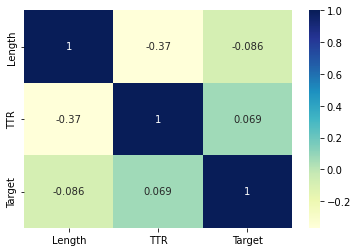

In [21]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

data = fedf[["Length", "TTR", "Target"]]
data.corr()
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [22]:
data.describe()

,Length,TTR,Target
count,5326.000000,5326.000000,5326.000000
mean,22.135749,0.471384,4.003004
std,15.159316,0.107804,1.994450
min,1.000000,0.100000,1.000000
25%,11.000000,0.400000,2.000000
50%,19.000000,0.450000,4.000000
75%,30.000000,0.520000,6.000000
max,187.000000,1.000000,7.000000


In [23]:
bins = [1, 22, 187]
labels = [0, 1]
fedf["length_binned"] = pd.cut(fedf['Length'], bins,labels=labels)

bins2 = [0.1, 0.47, 1]
labels2 = [0, 1]
fedf["ttr_binned"] = pd.cut(fedf['TTR'], bins2,labels=labels2)
fedf["Emotion-Target"] = fedf["Target"]


In [24]:
fedf = fedf.fillna(0)
fedf.drop(columns=["Length", "TTR", "Target"]).to_excel("inputData.xlsx")

In [25]:
fedf

,Length,TTR,Fear,Anger,Guilt,Joy,Shame,Disgust,Sadness,GuiltUnique,ShameUnique,JoyUnique,Negative,Target,length_binned,ttr_binned,Emotion-Target
0,10,0.30,0,1,0,1,0,0,1,0,0,0,0,4,0,0,4
1,21,0.43,1,1,1,0,1,1,0,0,0,0,1,1,0,0,1
2,6,0.67,1,1,1,1,1,1,1,0,0,0,0,4,0,1,4
3,49,0.41,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1
4,26,0.46,0,0,0,0,1,1,0,0,1,0,1,5,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,62,0.32,1,1,1,1,1,1,1,0,0,0,1,7,1,0,7
5322,37,0.35,1,1,1,1,1,1,1,1,0,0,1,3,1,0,3
5323,13,0.62,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1
5324,18,0.56,1,1,1,1,1,1,1,0,0,0,1,6,0,1,6


In [147]:
import numpy as np

class NaiveBayes:
    def __init__(self, df_train, df_test, no_labels):
        self.no_labels = no_labels
        self.N = df_train.shape[0]
        self.df_train = df_train
        self.df_test = df_test
        self.featureSet = ["Fear", "Anger", "Guilt", "Joy", "Shame", "Disgust", "Sadness", "GuiltUnique",
                           "ShameUnique", "JoyUnique", "Negative", "length_binned", "ttr_binned"]

        self.map_data_by_class = {}
        self.class_prob = [0] * self.no_labels
        self.evidence_prob = [[0] * len(self.featureSet) for i in range(self.no_labels)]
       # self.evidence_prob_false = [[0] * len(self.featureSet) for i in range(self.no_labels)]
        self.pred_prob = [[0] * self.no_labels for i in range(df_test.shape[0])]
        # shape of pred_prob = 5326(shape of test set) * 7


    def naive_bayes_fit(self):

        # split data by class
        for i in range(1, self.no_labels + 1):
            self.map_data_by_class[i] = self.df_train[self.df_train['Emotion-Target'] == i]

            # compute prior probability of each class P(y=i)
            self.class_prob[i - 1] = self.map_data_by_class.get(i).shape[0] / self.N

        # compute likelihood of evidence in each class, i=emotion, j=feature
        for i in range(1, self.no_labels + 1):
            for j, feature in enumerate(self.featureSet):
                cdf = self.map_data_by_class.get(i)  # class i
                self.evidence_prob[i - 1][j] = cdf[cdf[feature] == 1].shape[0] / cdf.shape[0]  # prob. that the feature is 1 in class i


    def predict(self, instance):
        pred_proba = []
        for i in range(self.no_labels):
            nominator = 0
            for j, value in enumerate(instance):
                if value == 1:
                    nominator = nominator + self.evidence_prob[i][j]
            p_tc = nominator / self.class_prob[i]
            pred_proba.append(np.log(p_tc) + np.log(self.class_prob[i]))
            #pred_proba.append(p_tc)
            pred_class = np.argmax(pred_proba)
        return pred_class

    def naive_bayes_predict(self):
        pred = []
        for ind, row in self.df_test.iterrows():
            pred.append(self.predict(row))
        self.df_test["Target-Predicted"] = pred
        return self.df_test




In [149]:
import warnings
warnings.filterwarnings("ignore")
input_df = pd.read_excel("./inputData.xlsx").drop(columns=["Unnamed: 0"])
#input_df = input_df[input_df["Emotion-Target"].isin([1, 4])]
modelObj = NaiveBayes(df_train=input_df, df_test=input_df.drop(columns=["Emotion-Target"]), no_labels=7)
modelObj.naive_bayes_fit()
pred = modelObj.naive_bayes_predict()


In [150]:
c = 0
for i, j in zip(input_df["Emotion-Target"], pred["Target-Predicted"]):
    if i == j:
        c += 1
print("Accuracy = ", round(c/input_df.shape[0] * 100, 2))

Accuracy =  14.27
